<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/Analysing_DataSet/AnalysingDataSet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scatter Plot Matrisi

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")  # flower species
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
 df.dtypes # çiçek türleri arasında bir ordinallik yok, nominallik var

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

df.shape()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Bu veri setinde kategorik değişkene daha çok odaklanacağız.

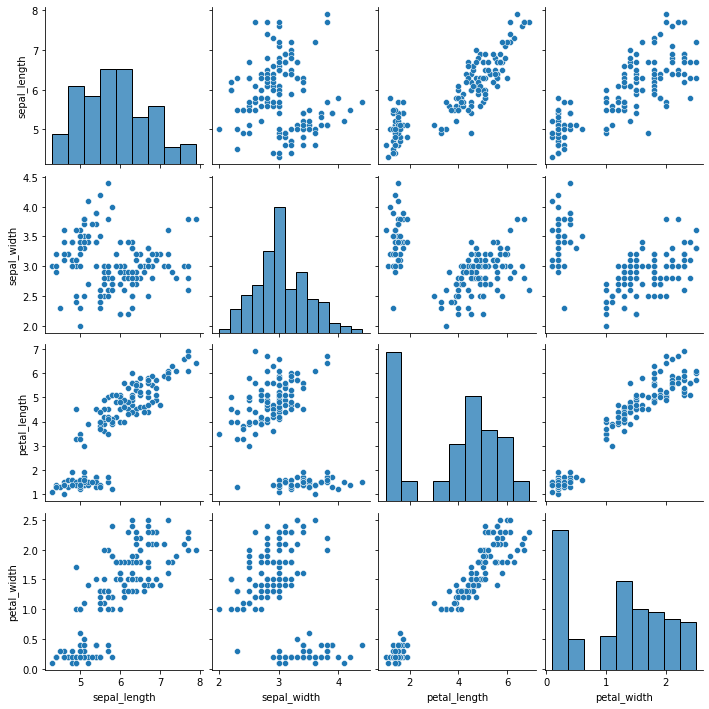

In [5]:
# hızlıca bir scatter plot oluşturalım
sns.pairplot(df)

Scatter plot grafikelrinde çıkan şekil toz bulutu gibiyse ve ya yapısal bir formu yoksa, o iki değişken arasında bir ilişki yoktur anlamına gelir.  <br>
<br>
Ayrıca scatter plotta gözlemler, birbirlerinden ayrı köşelerde kümeleniyorsa bunların alt kırılımalrına bakmak gerektiğini hatırla. Orada farklı bir değişken işin içine girdiğinde farklı bir dağılıma sebep olmuş olabilir.

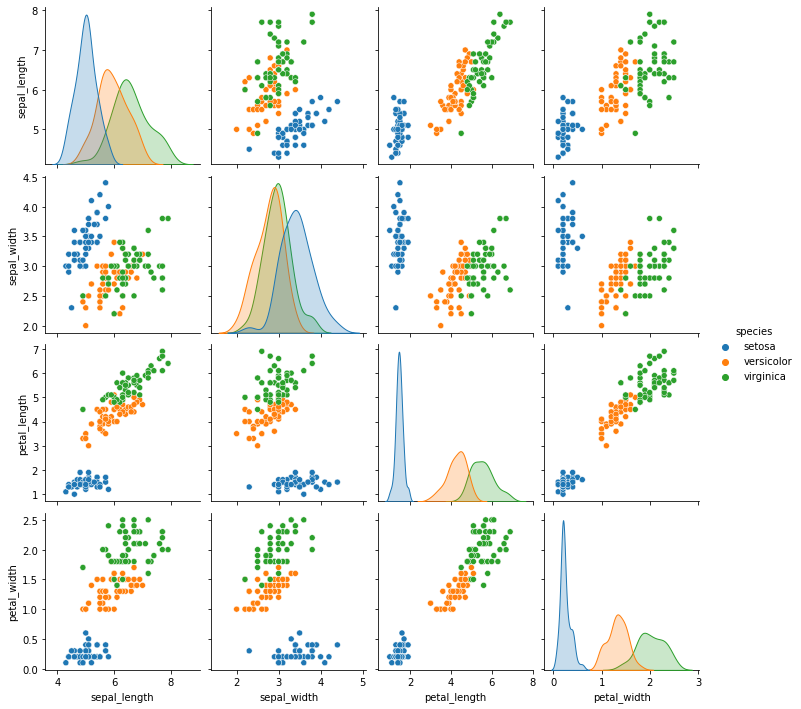

In [6]:
# bir boyut/kırılım ekleyelim. Hatırlarsan bu hue parametresi ile gerçekleşiyordu.
sns.pairplot(df, hue = "species")

Gördüğün üzere species (yani çicek türleri kolonunu) ekleyince köşelenmiş gözlemler biraz daha anlam kazandı.

In [8]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

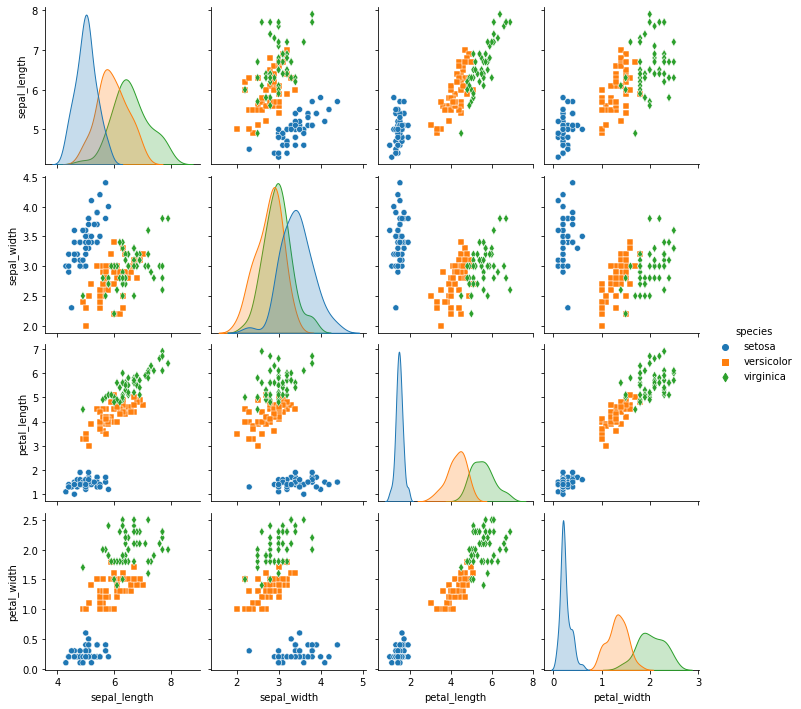

In [9]:
# şekil şukul bir gösterim yapalım, detaylara sabornun sayfasından bakabilirsin.
sns.pairplot(df, hue = "species", markers = ["o","s","d"])

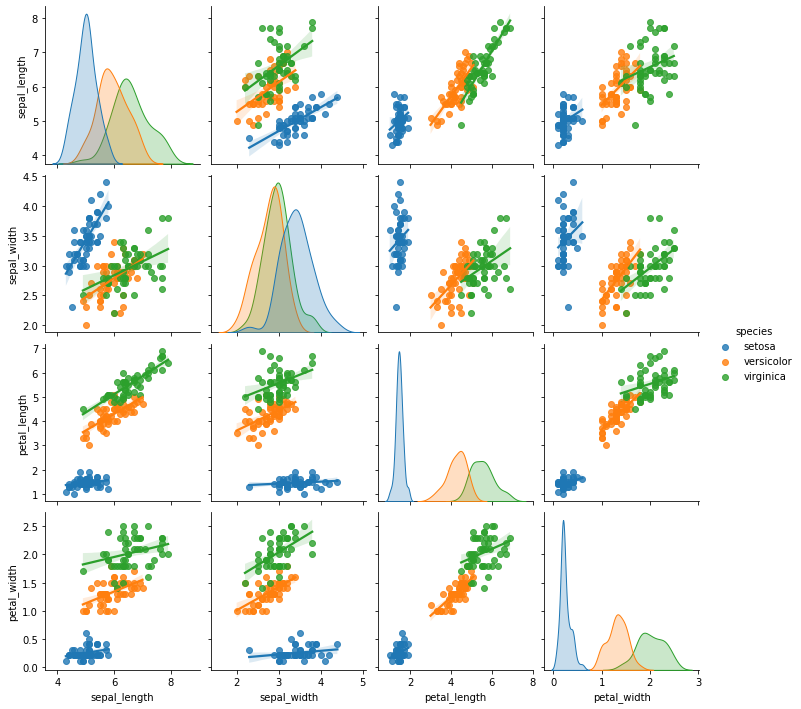

In [11]:
# grafiğe doğru ekleme
sns.pairplot(df, hue = "species", kind = "reg")

# Isı Haritası (HeatMap)
Elimizdeki değişkenleri daha yapısal anlamda, daha geniş ölçekte (büyük resimde) görmek istediğimizde kullandığımız bir grafik yöntemi/ grafik görselleştirme yöntemidir. <br>
Uzun vadeli, yani zamana dayalı veriler olduğunda; büyük ölçekli, belirli periyorlarla tekrar eden durumları görmek istediğimizde kullanulır!

In [17]:
flights = sns.load_dataset("flights") # yıllara ve aylara göre yolcu sayısını göstemektedir.
df = flights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [18]:
df.shape

(144, 3)

In [21]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [22]:
df.passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [23]:
df = df.pivot("month","year","passengers")
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


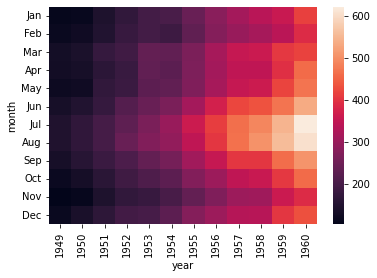

In [24]:
#heatmap pivot tablo alıyor!!
sns.heatmap(df)

Isı haritası, elimizde pattern detection (yapı saptama) problemleri olduğunda, çok güzel işler yapabilir.

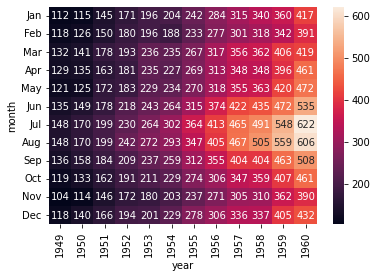

In [25]:
sns.heatmap(df, annot = True, fmt ="d")

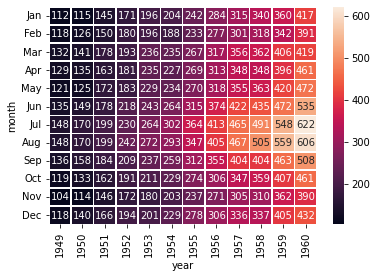

In [26]:
sns.heatmap(df, annot = True, fmt ="d", linewidths = 0.5)

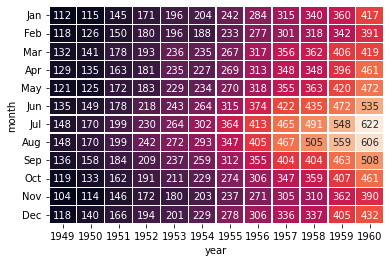

In [27]:
sns.heatmap(df, annot = True, fmt ="d", linewidths = 0.5, cbar = False)